In [1]:
import numpy as np
import tensorflow as tf
tf.__version__

'2.0.0-rc1'

##  Array and Slicing

In [2]:
arr = np.array([0, 1, 2, 3, 4, 5])
arr.shape

(6,)

In [3]:
# -1 index  == Last index
print(arr[0], arr[2], arr[-1])
print(arr[1:4], arr[1:-1])
print(arr[:2], arr[3:])

0 2 5
[1 2 3] [1 2 3 4]
[0 1] [3 4 5]


## Shape

In [4]:
t = tf.constant([1,2,3])
t.shape

TensorShape([3])

In [5]:
t = tf.constant([ [1,2]
                 ,[3,4]])
t.shape

TensorShape([2, 2])

In [6]:
t = tf.constant([[[[1,2,3,4],[5,6,7,8],[9,10,11,12]],
                  [[13,14,15,16],[17,18,19,20],[21,22,23,24]]]])
t.shape

TensorShape([1, 2, 3, 4])

## Matmul vs multiply
matmul - Product of a matrix <br>
multiply - element wise product

In [7]:
mat1 = tf.constant([[1,2,],[3,4]])
mat2 = tf.constant([[1],[2]])
print("Matrix1 shape:", mat1.shape)
print("Matrix2 shape:", mat2.shape)

Matrix1 shape: (2, 2)
Matrix2 shape: (2, 1)


In [8]:
# Matmul
tf.matmul(mat1, mat2)

<tf.Tensor: id=5, shape=(2, 1), dtype=int32, numpy=
array([[ 5],
       [11]])>

In [9]:
# multiply
mat1 * mat2

<tf.Tensor: id=6, shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [6, 8]])>

## Broadcasting
The shape is automatically adjusted<br>
(Care must be taken when calculating)

In [10]:
mat1 = tf.constant([[1,2]])
mat2 = tf.constant(3)
print(mat1+mat2)

tf.Tensor([[4 5]], shape=(1, 2), dtype=int32)


In [11]:
mat1 = tf.constant([[1,2]])
mat2 = tf.constant([3,4])
print(mat1+mat2)

tf.Tensor([[4 6]], shape=(1, 2), dtype=int32)


In [12]:
mat1 = tf.constant([[1,2]])
mat2 = tf.constant([[3],[4]])
print(mat1+mat2)

tf.Tensor(
[[4 5]
 [5 6]], shape=(2, 2), dtype=int32)


## Reduce mean
Note: Check the data type 
<br>
ex) [1, 2] mean is 1.5  but because of int type, result is 1

In [13]:
x = tf.constant([[1.,2.],
                 [3.,4.]])
x.dtype

tf.float32

In [14]:
print(tf.reduce_mean(x))

tf.Tensor(2.5, shape=(), dtype=float32)


Calculated based on a specific axis 

In [15]:
print(tf.reduce_mean(x , axis=0))
print(tf.reduce_mean(x , axis=1)) # same axis = -1

tf.Tensor([2. 3.], shape=(2,), dtype=float32)
tf.Tensor([1.5 3.5], shape=(2,), dtype=float32)


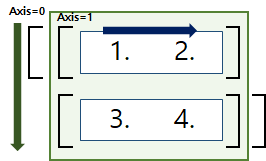

## Reduce sum

In [16]:
print(tf.reduce_sum(x , axis=0))
print(tf.reduce_sum(x , axis=1)) # same axis = -1

tf.Tensor([4. 6.], shape=(2,), dtype=float32)
tf.Tensor([3. 7.], shape=(2,), dtype=float32)


## Argmax
Extract the maximum value

In [17]:
x = tf.constant([[0, 1, 2],
                 [2, 1, 0]])

In [18]:
print(tf.argmax(x, axis=0))
print(tf.argmax(x, axis=1))

tf.Tensor([1 0 0], shape=(3,), dtype=int64)
tf.Tensor([2 0], shape=(2,), dtype=int64)


## Reshape
Change to desired shape

In [19]:
x = tf.constant([[[0, 1, 2]],
                 [[3, 4, 5]]])
x

<tf.Tensor: id=32, shape=(2, 1, 3), dtype=int32, numpy=
array([[[0, 1, 2]],

       [[3, 4, 5]]])>

In [20]:
x = tf.reshape(x, shape=[-1, 3])  # -1: Automatically adjust
x

<tf.Tensor: id=34, shape=(2, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5]])>

### squeeze, expand
squeeze: combining dimensions into one <br>
expand : expand the dimensions

In [21]:
tf.squeeze([[[0],[1],[2]]])

<tf.Tensor: id=36, shape=(3,), dtype=int32, numpy=array([0, 1, 2])>

In [22]:
tf.expand_dims([0,1,2], 1)

<tf.Tensor: id=39, shape=(3, 1), dtype=int32, numpy=
array([[0],
       [1],
       [2]])>

## One hot
class: 0 1 2 3 <br>
0 : [1, 0, 0, 0] <br>
1 : [0, 1, 0, 0] <br>
2 : [0, 0, 1, 0] <br>
3 : [0, 0, 0, 1]

In [23]:
class_list = [0, 1, 2, 3]

In [24]:
tf.one_hot(class_list, depth=4)

<tf.Tensor: id=44, shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

## Casting

In [25]:
float_arr = [1.8, 2.2, 4.1, 0.5]

In [26]:
# change data type (ex. float -> int)
print(tf.cast(float_arr, tf.int32))

tf.Tensor([1 2 4 0], shape=(4,), dtype=int32)


In [27]:
# change data type (ex. boolean -> int)
print(tf.cast([1==1, 1==3], tf.int32))

tf.Tensor([1 0], shape=(2,), dtype=int32)


## Stack

In [28]:
x = [1, 4]
y = [2, 5]
z = [3, 6]

In [29]:
print(tf.stack([x,y,z], axis=0))

tf.Tensor(
[[1 4]
 [2 5]
 [3 6]], shape=(3, 2), dtype=int32)


In [30]:
print(tf.stack([x,y,z], axis=1))

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


## Ones, Zeros
Ones: Create an array of ones of the desired size <br>
Zeros: Create an array of zeros of the desired size

In [31]:
tf.ones([3,4])

<tf.Tensor: id=57, shape=(3, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [32]:
tf.zeros([3,4])

<tf.Tensor: id=60, shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

## Zip
Can handle multiple arrays

In [33]:
a = [1, 2, 3]
b = [4, 5, 6]

for x, y in zip (a,b):
    print(x, y)

1 4
2 5
3 6
